<a href="https://colab.research.google.com/github/durga207/NITK-IT/blob/master/NITK-IT/Sem-6/IT350/IT350_A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn import datasets
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_rows', 30)

# SVD

In [ ]:
!pip install plotly-express
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn import datasets

# load iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['Species']=y
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



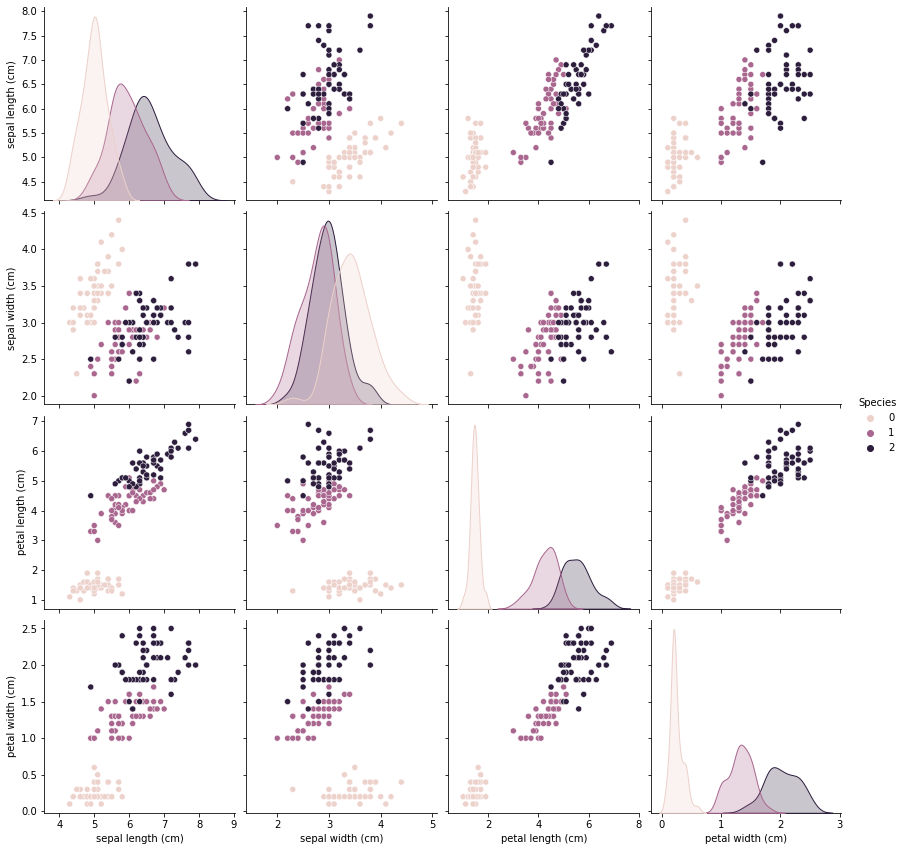

In [ ]:
sns.pairplot(df, hue="Species", size=3)
plt.show()

In [ ]:
px.scatter_3d(df, x="petal length (cm)", y="petal width (cm)", z="sepal length (cm)", size="sepal width (cm)", 
              color="Species", color_discrete_map = {"Joly": "blue", "Bergeron": "violet", "Coderre":"pink"})

In [ ]:
def svd(A, tol=10):
    eigs, V = np.linalg.eig(A.T.dot(A))
    sing_vals = np.sqrt(eigs)
    idx = np.argsort(sing_vals)
    sing_vals = sing_vals[idx[::-1]]
    V = V[:, idx[::-1]]
    sing_vals_trunc = sing_vals[sing_vals > tol]
    V = V[:, sing_vals > tol]
    sigma = sing_vals_trunc
    U = A @ V @ sigma.T
    return U.real, sigma.real, V.T.real

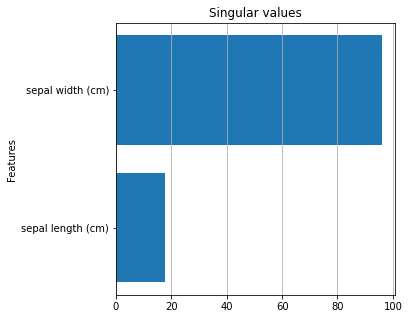

In [ ]:
U, S, Vt = svd(X)
plt.figure(figsize=(5, 5))
plt.barh(df.columns[:S.shape[0]], S[::-1])
plt.ylabel("Features")
plt.title("Singular values")
plt.gca().xaxis.grid(True)


In [ ]:
class PCA:
    def fit_transform(self, X, n_components=2):
        self.n_samples = X.shape[0]
        self.n_components = n_components
        self.A = self.standardize_data(X)
        covariance_matrix = self.get_covariance_matrix()
        eigenvectors = self.get_eigenvectors(covariance_matrix)
        projected_matrix = self.project_matrix(eigenvectors)
        return projected_matrix

    def standardize_data(self, X):
        numerator = X - np.mean(X, axis=0)
        denominator = np.std(X, axis=0)
        return numerator / denominator
    
    def get_covariance_matrix(self, ddof=0):
        C = np.dot(self.A.T, self.A) / (self.n_samples-ddof)
        return C

    def get_eigenvectors(self, C):
        eigenvalues, eigenvectors = np.linalg.eig(C)
        n_cols = np.argsort(eigenvalues)[::-1][:self.n_components]
        selected_vectors = eigenvectors[:, n_cols]
        return selected_vectors

    def project_matrix(self, eigenvectors):
        P = np.dot(self.A, eigenvectors)
        return P

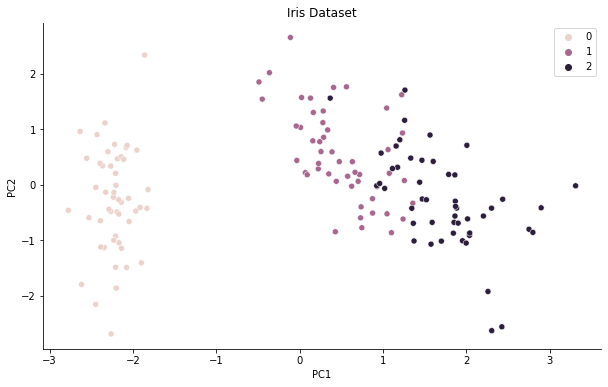

In [ ]:
X = iris.data
y = iris.target
# print(iris)
# instantiate and fit_transform PCA
pca = PCA()
X_pca = pca.fit_transform(X, n_components=2)

# plot results
fig, ax = plt.subplots(1, 1, figsize=(10,6))

sns.scatterplot(
    x = X_pca[:,0],
    y = X_pca[:,1],
    hue=y
)

ax.set_title('Iris Dataset')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

sns.despine()